<a href="https://colab.research.google.com/github/rajadevineni/House_Price_Prediction/blob/master/KNN_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Loading the Data**

In [13]:
data =  pd.read_csv("data.csv")
make_prediction= pd.read_csv("make_prediction.csv")

In [14]:
print(data.shape)
print(make_prediction.shape)

(3000, 18)
(1552, 17)


In [15]:
pd.set_option('display.max_columns', 999)
data.head()

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1,591000.0,3,1.75,1680,2400,1.0,0,0,5,870,810,1922,1956,1600-1608 25th Ave,Seattle,WA 98122,USA
1,2,415000.0,4,2.25,3060,48787,2.0,0,0,3,3060,0,1992,0,31701-31799 SE 291st St,Ravensdale,WA 98051,USA
2,3,402000.0,3,2.50,1960,8000,1.0,0,0,4,1290,670,1977,0,12207 NE 139th Pl,Kirkland,WA 98034,USA
3,4,542525.0,4,2.50,2650,5600,2.0,0,0,3,2650,0,2014,0,13516 164th Ave SE,Renton,WA 98059,USA
4,5,515000.0,3,2.50,2010,7200,2.0,0,0,3,2010,0,1994,0,8818 NE 150th St,Kenmore,WA 98028,USA


In [16]:
make_prediction.head()

,Id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3000,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA
1,3001,3,1.75,1620,3975,1.0,0,0,5,940,680,1926,0,6729 Dibble Ave NW,Seattle,WA 98117,USA
2,3002,3,1.00,1520,213444,1.5,0,3,5,1520,0,1988,0,10500 185th Ave SE,Renton,WA 98059,USA
3,3003,4,2.50,2910,5776,2.0,0,2,3,2910,0,1998,2006,6907 Fairway Ave SE,Snoqualmie,WA 98065,USA
4,3004,4,2.50,2683,40386,2.0,0,0,4,2683,0,1987,0,10821 151st Ave NE,Redmond,WA 98052,USA


In [17]:
data.describe()

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,5.593498e+05,3.397000,2.158250,2134.094000,1.464680e+04,1.511333,0.008333,0.242000,3.447000,1821.023333,313.070667,1971.042667,792.034333
std,866.169729,6.346427e+05,0.910128,0.770071,946.966058,3.634340e+04,0.541420,0.090921,0.783352,0.674297,844.532322,466.736261,29.622874,976.379493
min,1.000000,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,750.750000,3.250000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,1500.500000,4.642500e+05,3.000000,2.250000,1975.000000,7.651000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2250.250000,6.575000e+05,4.000000,2.500000,2630.000000,1.090125e+04,2.000000,0.000000,0.000000,4.000000,2303.000000,620.000000,1997.000000,1999.000000
max,3000.000000,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## **Creating feature set(X) and target set(Y)**
While creating the feature set we drop the unwanted columns like ID, Street and country

In [18]:
X = data.drop(['price','Id','street','country'], axis=1)
y = data['price']
print("shape of independent set:",X.shape)
print("shape of target set:",y.shape)

shape of independent set: (3000, 14)
shape of target set: (3000,)


# **1.	Determine, which features, are continuous vs categorical**

In [19]:
categorical_features = ['view','condition','waterfront']
discreate_features = ['bedrooms','bathrooms','floors']
continous_features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']
print("Categorical Features: ")
for i in categorical_features:
  print("\t",i)
print("Discreate Features: ")
for i in discreate_features:
  print("\t",i)
print("Continous Features: ")
for i in continous_features:
  print("\t",i)

Categorical Features: 
	 view
	 condition
	 waterfront
Discreate Features: 
	 bedrooms
	 bathrooms
	 floors
Continous Features: 
	 sqft_living
	 sqft_lot
	 sqft_above
	 sqft_basement
	 yr_built
	 yr_renovated


# **2.	Visualize the univariate distribution of each continuous feature, and the distribution of the target**

## **Distribution of each continuous feature**
### **Key take aways from disctribution graphs:**
* More than half of the data doesn't have the year of rennovation values, that can be either due to no rennovations recorded for that house or no rennovations done
* There are outliers in variables like "sqft_lot" with abnormal data values

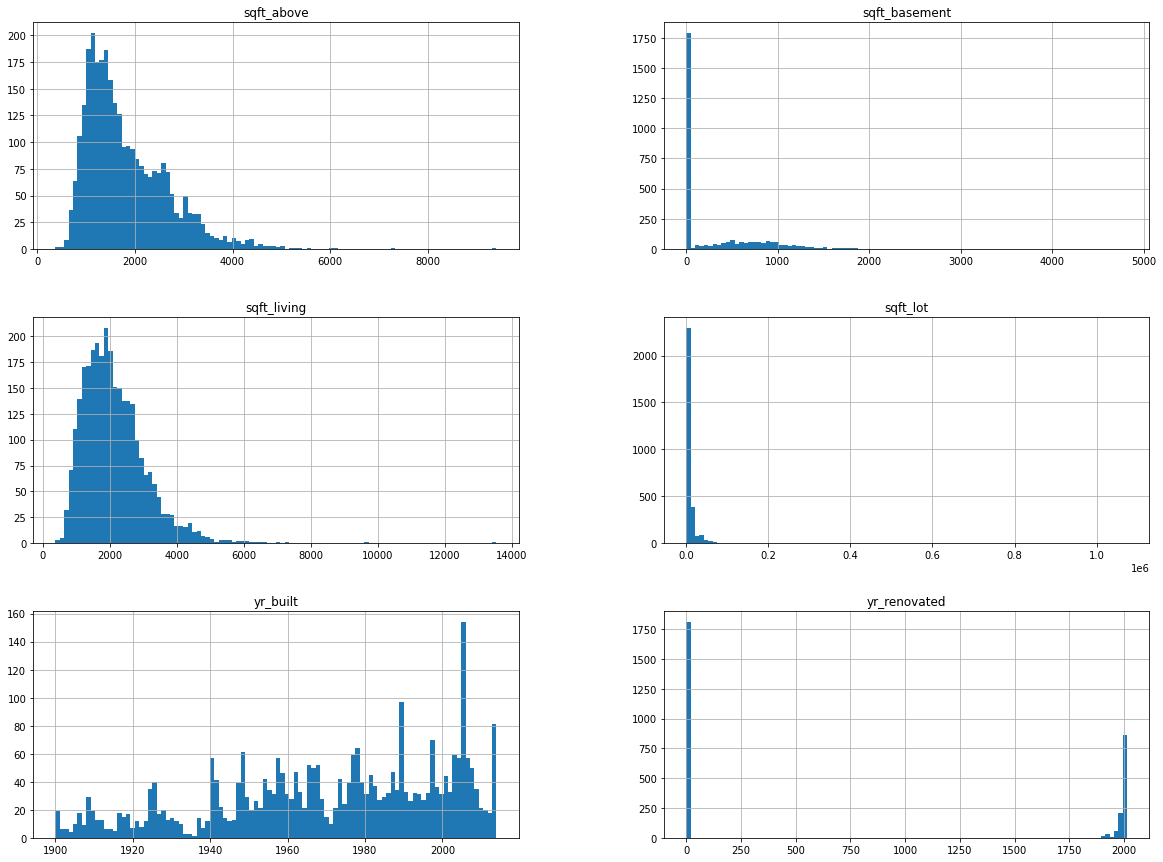

In [20]:
data[continous_features].hist(bins=100, figsize=(20,15))
plt.show()

## **Distribution of Prices**

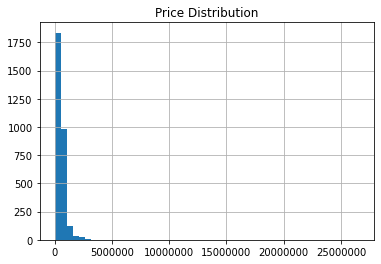

In [21]:
y.hist(bins=50)
plt.title("Price Distribution")
plt.ticklabel_format(useOffset=False, style='plain') # removing the scientific scales on the axes
plt.show()

# **3. Do you notice anything? Is there something that might require special treatment?**

# **4. Dependency of the price on each continuous feature.**



## **"visualize_dependency(features)" function generates dependancy graphs for different types of variables.**


In [57]:
def visualize_dependency(features):
  rows = len(features)//3
  fig, axs = plt.subplots(rows, 3, sharey=True, tight_layout=True, figsize=(20,10))
  axs = axs.ravel()
  for i in range(len(features)):
      axs[i].plot(X[features[i]],y, '.')
      axs[i].set_title(str(features[i])+ " Dependancy")
      axs[i].set_xlabel(features[i])
      axs[i].set_ylabel('House Price')
      axs[i].ticklabel_format(useOffset=False, style='plain') # removing the scientific scales on the axes

### **Visualizing dependancy of price on Continous Features**

* Looking at the scatter plots, we can see that there are few outliers in the data with abnormal data values which was also seen in the univariate distribution graphs

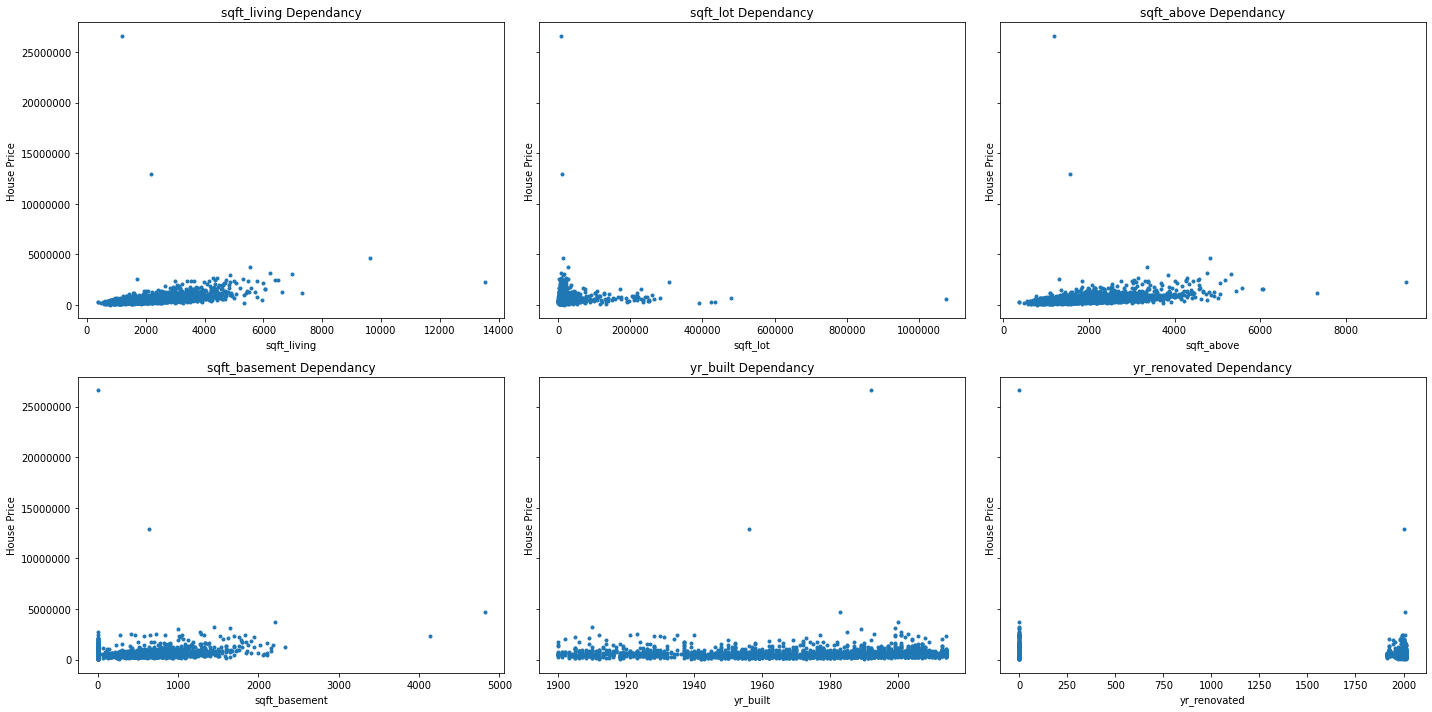

In [58]:
visualize_dependency(continous_features)



## **Visualizing dependancy of price on Discrete Features**

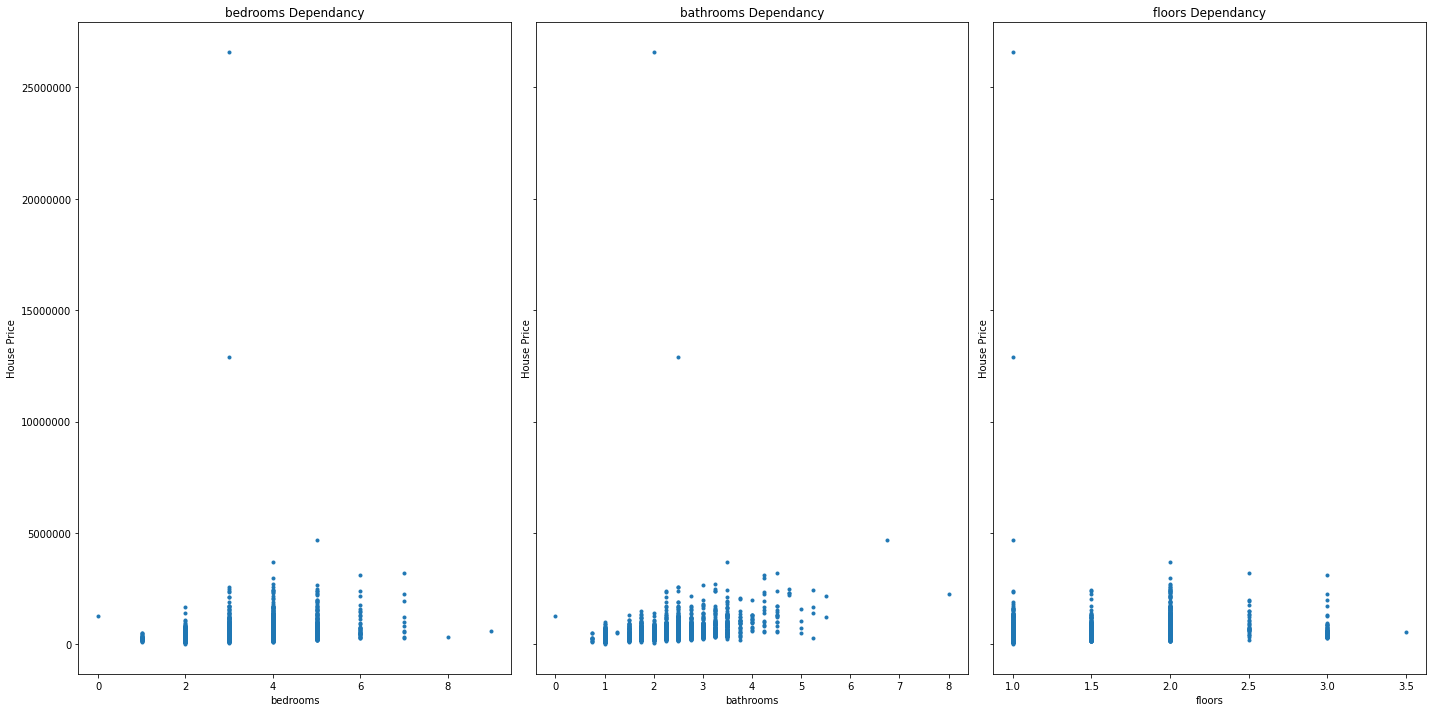

In [59]:
visualize_dependency(discreate_features)

## **Visualizing dependancy of price on Categorical Features**

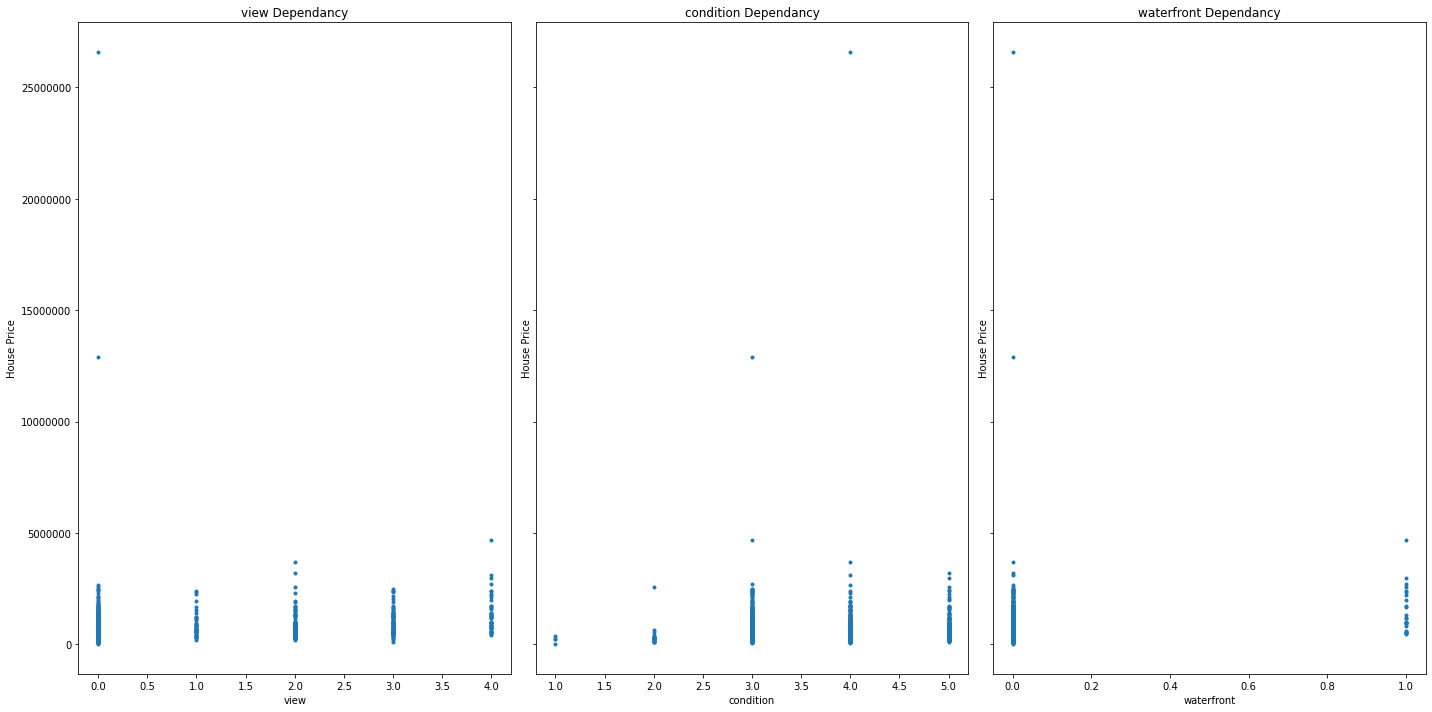

In [60]:
visualize_dependency(categorical_features)

## **5. Encode categorical variables (One hot encoding). Impute missing values (0’s in some columns might be missing values).**

In [61]:
total_null_values = data.isnull().sum()
for key,value in total_null_values.items():
  if value>0:
    print(key,":",value)